## Importing and Understanding Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
car_df = pd.read_csv("./CarPrice_Assignment.csv", encoding='iso-8859-1')

## EDA
### Cleaning Data

In [3]:
car_df['car_company']= pd.DataFrame(car_df.CarName.str.split(" ",1).str.get(0).str.strip())

In [4]:
car_df.car_company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

##### As we can see above Company name has some mismatch in name like 
- 'maxda', 'mazda', 'vokswagen', 'volkswagen', 'vw', 'toyota', 'toyouta','porsche', 'porcshce' so we can clean with proper name.

In [5]:
car_df['car_company'] = car_df['car_company'].replace({'maxda':'mazda','vokswagen':'volkswagen',
                                                         'vw':'volkswagen','toyouta':'toyota','porcshce':'porsche'})
car_df['car_company'] = car_df.car_company.str.lower()

In [6]:
car_df.drop(['CarName'],axis=1,inplace=True)
car_df = car_df.drop(['car_ID'],axis=1)

In [7]:
# As we can see there is no NAN value 
round(100*(car_df.isnull().sum()/len(car_df.index)), 2)

symboling           0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
car_company         0.0
dtype: float64

In [8]:
# Let's look at some statistical information about our dataframe.
car_df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Bivariate Analysis on Continuous Variables
- Visualising Data 

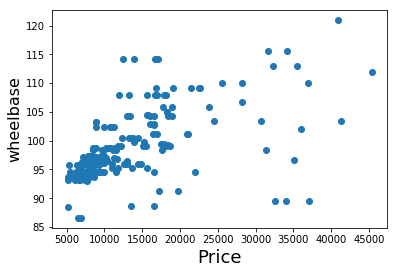

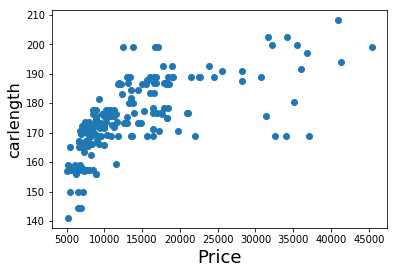

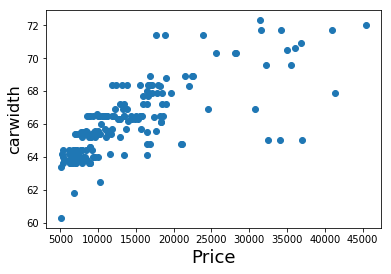

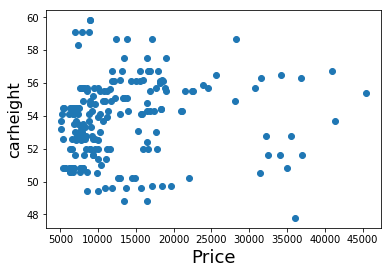

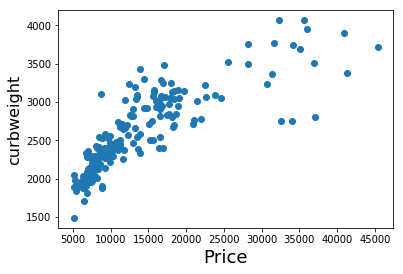

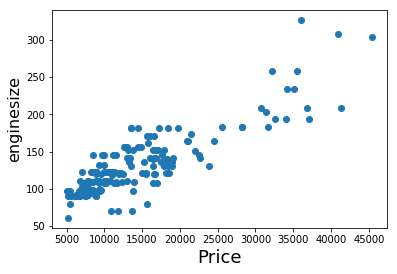

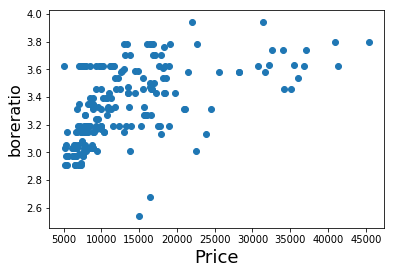

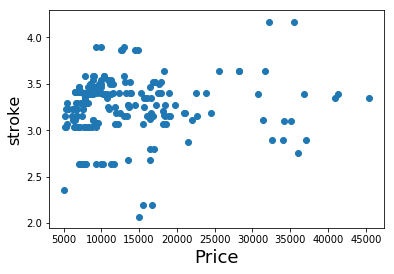

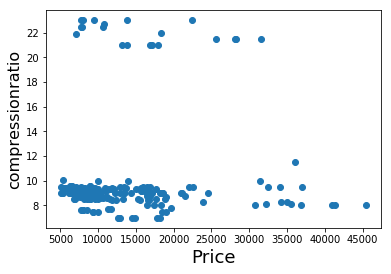

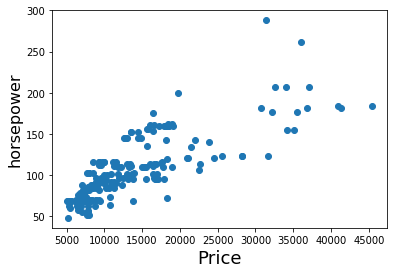

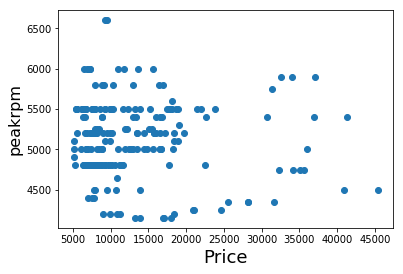

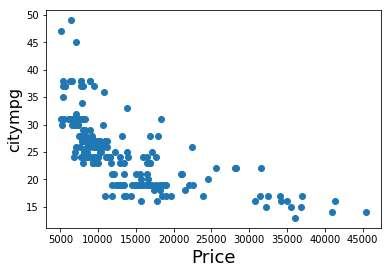

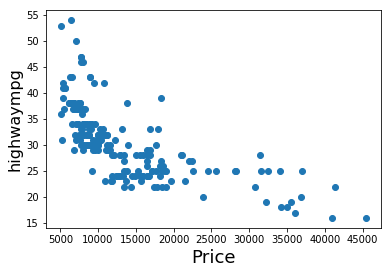

In [9]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Continuous variable
continuous_column = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize',
          'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']

for col in continuous_column:
    fig = plt.figure()
    plt.scatter(car_df['price'],car_df[col])
    plt.xlabel('Price', fontsize=18)                         
    plt.ylabel(col, fontsize=16)   
    


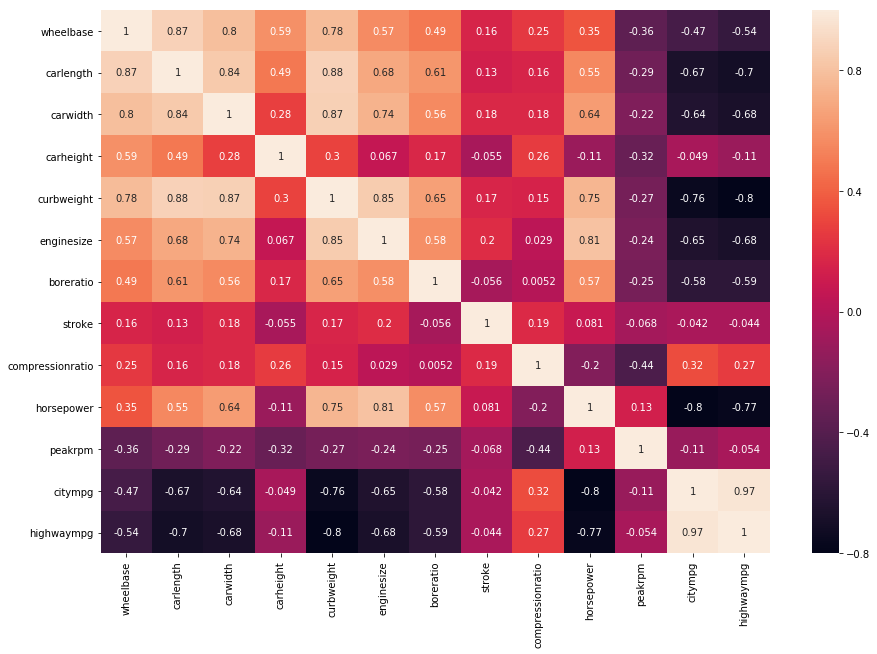

In [10]:
# Correlation matrix  
corr = car_df[continuous_column].corr()
# plt.figure(figsize=(20,9))
# a = sns.heatmap(corr, annot=True, fmt='.2f')

plt.figure(figsize=(15, 10))

sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.show()

#Bellow finding
#Vehicle Mileage decrease as increase in Horsepower , enginesize, Curbweight
#As horsepower increase the engine size increases

### Un-Ordered Categorical Variables Univariate Analysis
- carbody,drivewheel,enginetype,cylindernumber,fuelsystem,Company_name

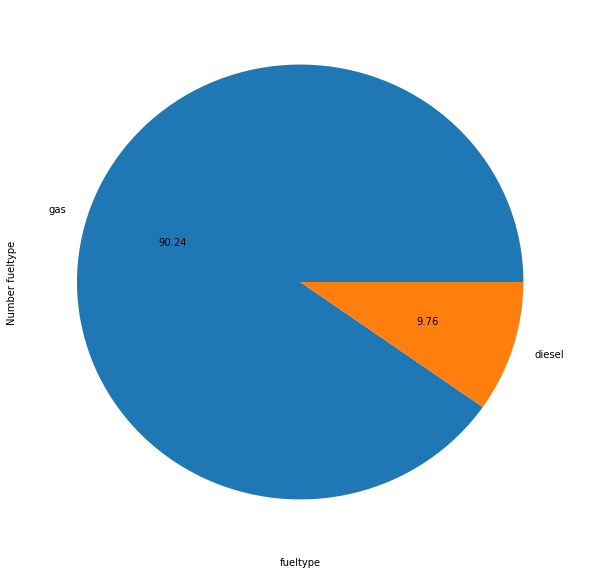

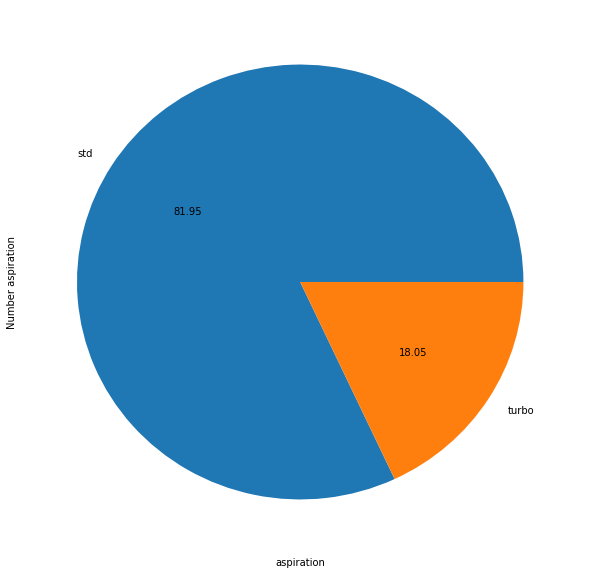

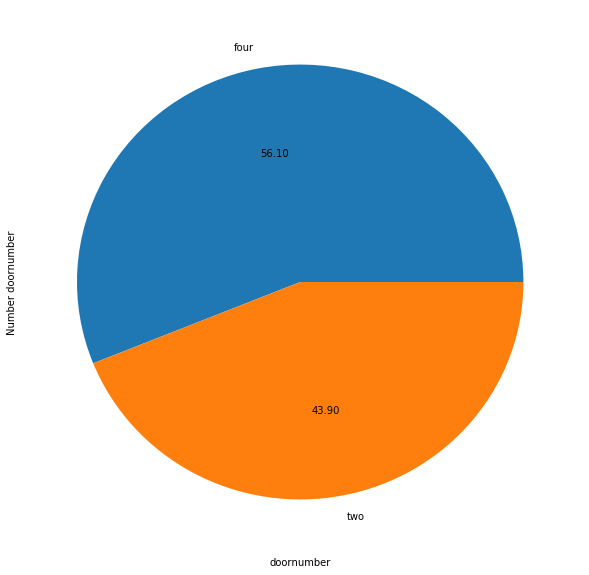

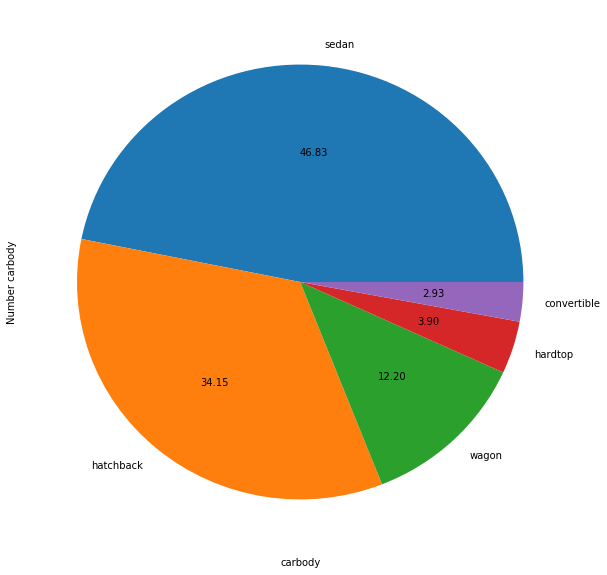

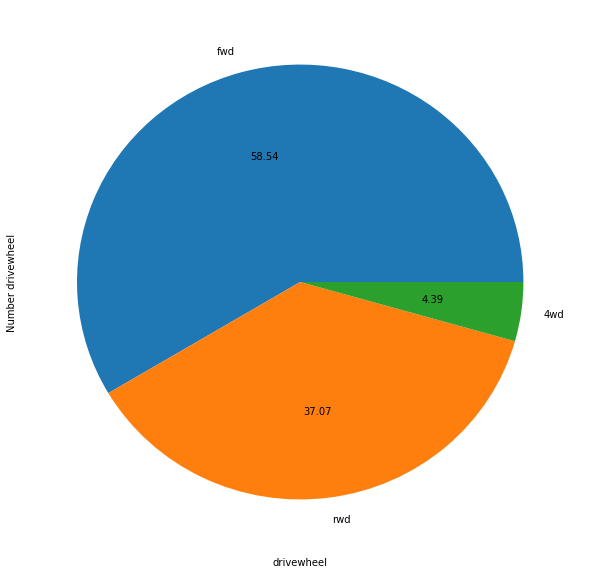

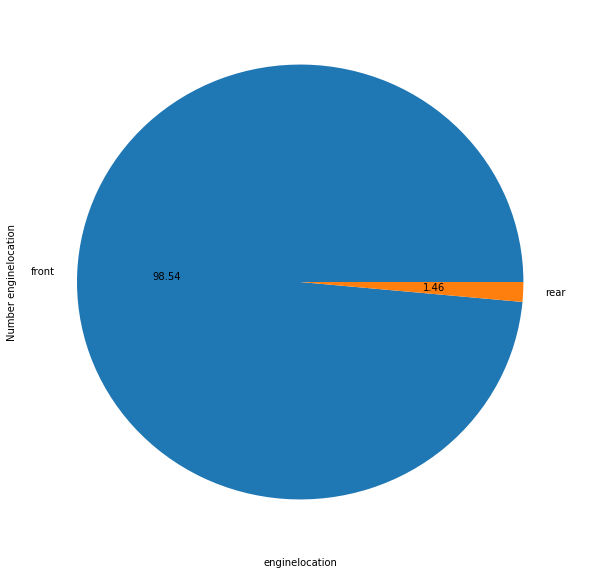

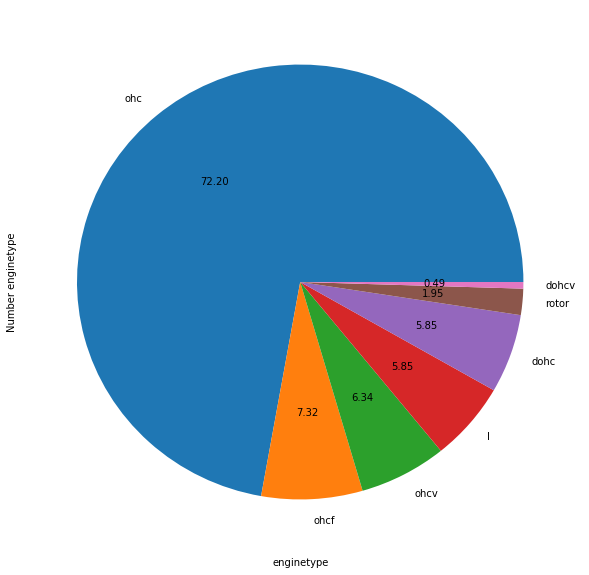

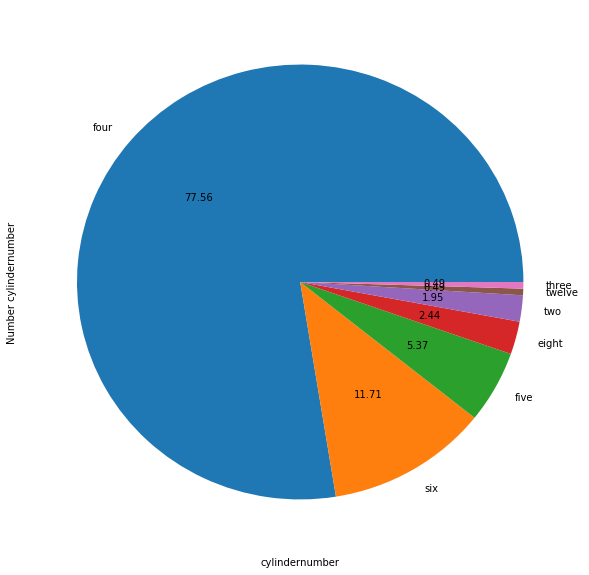

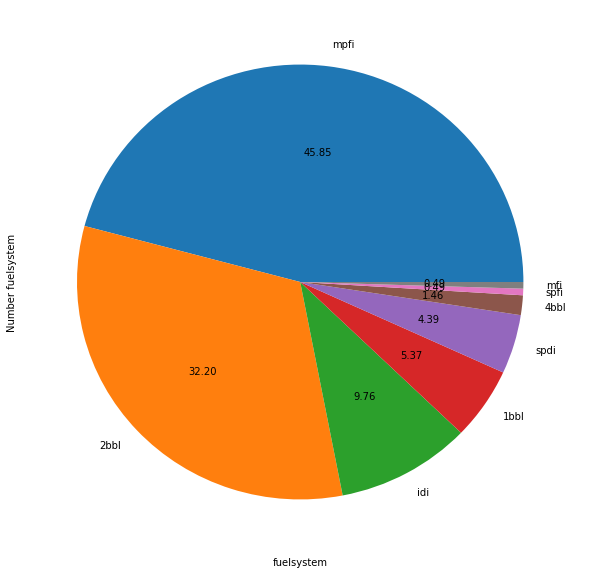

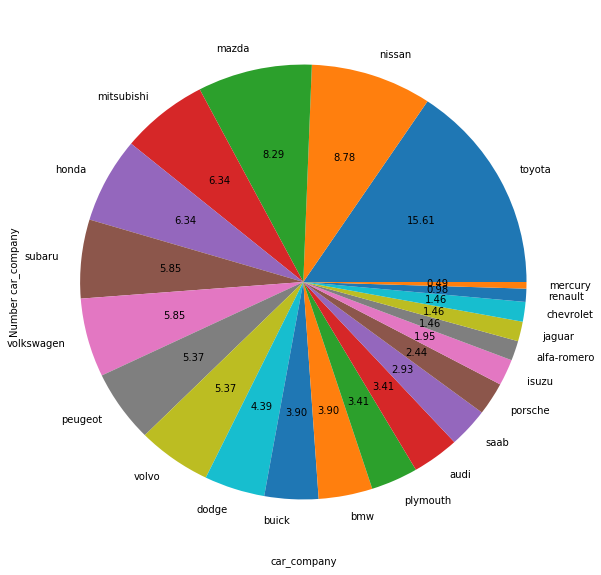

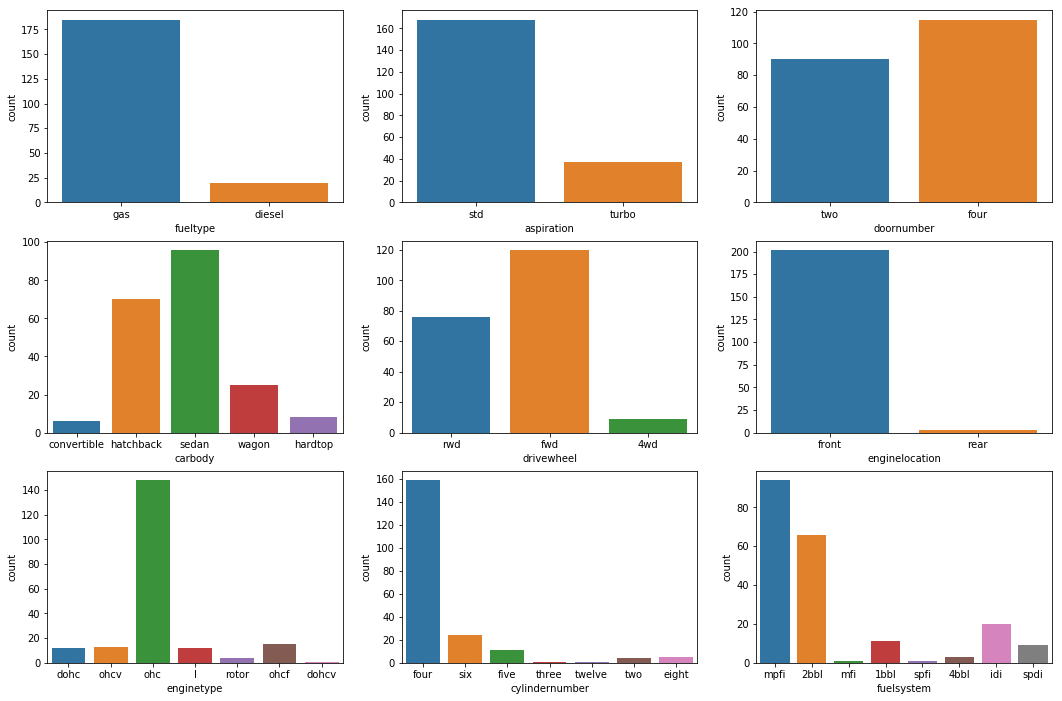

In [12]:
categorical_column = [col for col in car_df.columns if car_df.dtypes[col] == 'object']

for col in categorical_column:
    plt.figure(figsize=(20, 15))
    car_df[col].value_counts().plot.pie(figsize=(10, 10), autopct='%.2f')
    plt.ylabel('Number '+ col)
    plt.xlabel(col);

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
for col, ax in zip(categorical_column, axs.ravel()):
    sns.countplot(x=col, data=car_df, ax=ax)


### In above Observation
- Enginetype dohcv and rotor has very less % of observation we can remove once we create dummy variable.
- Cylindernumber three and twelve has very less % of observation we can remove.
- Fulesystem spfi, mfi, 4bbl we can remove not even 2% of observation.
- Company_name mercury and renault we can remove 
- enginlocation is not relible only 1.2% data in rear we can eliminate this
- More then 90% fultetype used gas.
- Majority used aspiration


### Bivariate Analysis on Categorical Data

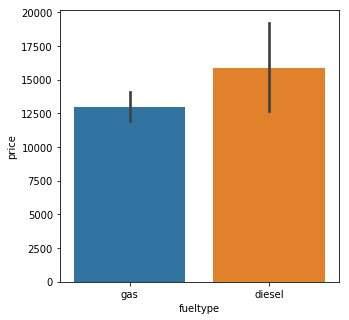

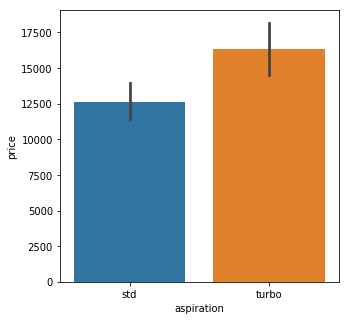

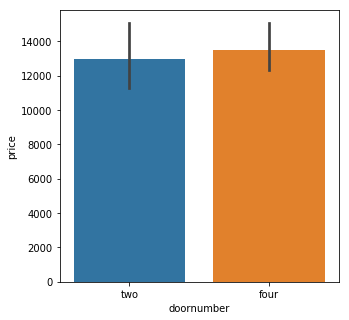

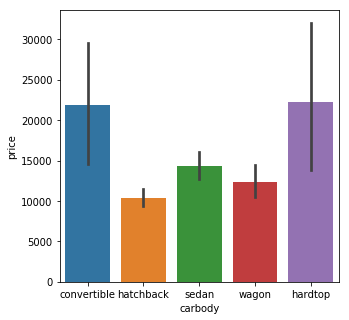

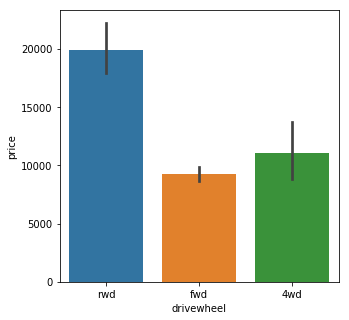

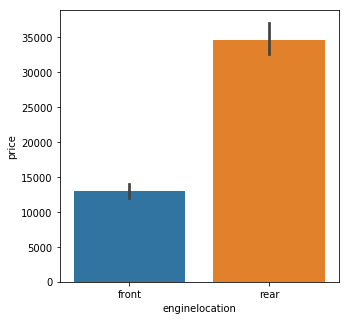

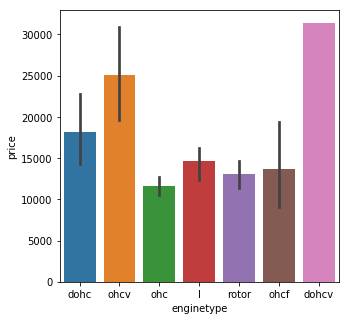

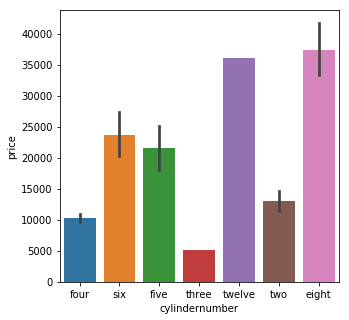

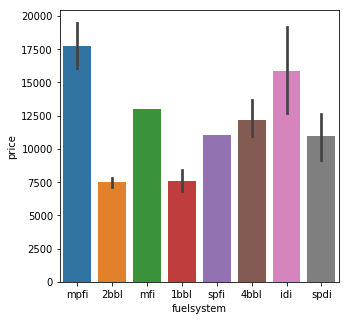

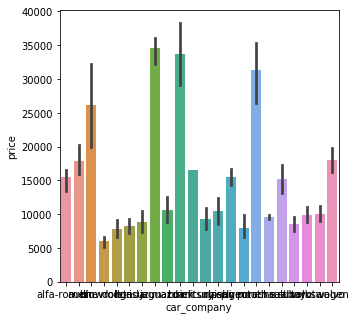

In [18]:
# for col in categorical_column:
#     plt.figure(figsize=(5, 5))
#     sns.barplot(x='price', y=col, data=car_df)
    
for col in categorical_column:
    plt.figure(figsize=(5, 5))
    sns.barplot(x=col, y='price', data=car_df)
    plt.show()


### Data Prepration

In [16]:
# Converting binary category into 1 and 0
car_df['fueltype'] = car_df['fueltype'].map({'gas': 1, 'diesel': 0})
car_df['aspiration'] = car_df['aspiration'].map({'std': 1, 'turbo': 0})
car_df['doornumber'] = car_df['doornumber'].map({'two': 1, 'four': 0})
car_df['enginelocation'] = car_df['enginelocation'].map({'front': 1, 'rear': 0})

In [17]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg        

#### Creating dummy variable for variable drivewheel with n-1

In [18]:
categorical_column = [col for col in car_df.columns if car_df.dtypes[col] == 'object']
Data_category = pd.get_dummies(car_df[categorical_column], drop_first=True)
automobile_df = pd.concat([car_df, Data_category], axis=1)
automobile_df.drop(categorical_column, axis=1, inplace=True)
automobile_df.head(2)

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
1,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Total 65 Columns
automobile_df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'car_company_audi', 'car_company_bmw',
       'car_company_buick', 'car_company_chevrolet', 'car_company_dodge',
       'car_company_honda', 'car_company_isuzu', 'car_compa

In [20]:
#Based on the EDA analysis we can delete these as they are not going to add any value as they are verly less % in population.
automobile_df = automobile_df.drop(['enginetype_dohcv','enginetype_rotor','cylindernumber_three',
                                    'cylindernumber_twelve','fuelsystem_spfi','fuelsystem_mfi','fuelsystem_4bbl',
                                    'car_company_mercury','car_company_renault','fueltype','enginelocation'],axis=1)



### Rescaling the Features
- It is extremely important to rescale the variables so that they have a comparable scale.

- Normalisation (min-max scaling) and
- standardisation (mean-o, sigma-1) Let's try normalisation

In [21]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalize ( ) to all columns 
automobile_df = automobile_df.apply(normalize) 

### user define function for calculating vif value

In [22]:
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [23]:
# automobile_df = automobile_df.drop(['symboling'],axis=1)
automobile_df.columns

Index(['symboling', 'aspiration', 'doornumber', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_idi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'car_company_audi',
       'car_company_bmw', 'car_company_buick', 'car_company_chevrolet',
       'car_company_dodge', 'car_company_honda', 'car_company_isuzu',
       'car_company_jaguar', 'car_company_mazda', 'car_company_mitsubishi',
       'car_company_nissan', 'car_company_peugeot', 'car_company_plymouth',
       'car_company_porsche', 'car_company_saab', 'car

In [24]:
# UDF for feature getting feature variable
def get_feature_variable(df,dependent_var):
    return df.loc[:,df.columns!=dependent_var], df[dependent_var]

In [25]:
# Putting feature variable to X
# Putting response variable to y

X,y = get_feature_variable(automobile_df, 'price')


#### Splitting Data into Training and Testing Sets

In [28]:
#random_state is the seed used by the random number generator, it can be any integer.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

### First Model preparation 

In [29]:

X_train = sm.add_constant(X_train)
# create a fitted model in one line
lm_1 = sm.OLS(y_train,X_train).fit()

In [30]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     56.98
Date:                Mon, 10 Dec 2018   Prob (F-statistic):           8.83e-51
Time:                        18:48:50   Log-Likelihood:                 286.30
No. Observations:                 143   AIC:                            -464.6
Df Residuals:                      89   BIC:                            -304.6
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [31]:
vif_cal(input_data=automobile_df, dependent_col="price")

,Var,Vif
7,curbweight,236.77
27,cylindernumber_four,219.25
11,compressionratio,218.11
15,highwaympg,215.88
14,citympg,206.68
4,carlength,199.01
31,fuelsystem_idi,170.98
8,enginesize,163.66
5,carwidth,117.15
9,boreratio,107.44


### Building model-2 with RFE

In [32]:
def get_RFE(independent_data,dependent_data, no_of_variable):
    lm = LinearRegression()
    rfe = RFE(lm, no_of_variable)             # running RFE
    rfe = rfe.fit(independent_data, dependent_data)
    return rfe

In [33]:
#Feature variable for model-2
X_m2,y_m2 = get_feature_variable(automobile_df, 'price')


In [34]:
#Splitting Data into Training and Testing Sets
#random_state is the seed used by the random number generator, it can be any integer.
X_train_m2, X_test_m2, y_train_m2, y_test_m2 = train_test_split(X_m2, y_m2, train_size=0.7 ,test_size = 0.3, random_state=100)

In [35]:
#Apply RFE to reduce the Feature

rfe = get_RFE(X_train_m2, y_train_m2, 15)
col_m2 = X_train_m2.columns[rfe.support_]
print('List of Columns After RFE:')
print(list(col_m2))

List of Columns After RFE:
['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'stroke', 'compressionratio', 'enginetype_l', 'enginetype_ohcf', 'cylindernumber_two', 'fuelsystem_idi', 'car_company_bmw', 'car_company_peugeot', 'car_company_porsche', 'car_company_subaru']


#### creating new DataFrame with selected Feature with RFE

In [36]:
col_m2 = list(col_m2)
col_m2.append('price')
automobile_for_m2_df = automobile_df[col_m2] 

In [37]:
# Featur Variable for Model-2_1
X_m2_1,y_m2_1 = get_feature_variable(automobile_for_m2_df, 'price')

In [38]:
#Splitting Data into Training and Testing Sets
#random_state is the seed used by the random number generator, it can be any integer.
X_train_m2_1, X_test_m2_1, y_train_m2_1, y_test_m2_1 = train_test_split(X_m2_1, y_m2_1, train_size=0.7 ,test_size = 0.3, random_state=100)

In [39]:
# Preparing Model-2

X_train_m2_1 = sm.add_constant(X_train_m2_1)
# create a fitted model in one line
lm_2 = sm.OLS(y_train_m2_1,X_train_m2_1).fit()

In [40]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     114.2
Date:                Mon, 10 Dec 2018   Prob (F-statistic):           4.77e-66
Time:                        18:49:08   Log-Likelihood:                 223.40
No. Observations:                 143   AIC:                            -414.8
Df Residuals:                     127   BIC:                            -367.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0211    

In [41]:
vif_cal(input_data=automobile_for_m2_df, dependent_col="price")

,Var,Vif
1,carlength,72.24
3,curbweight,68.60
2,carwidth,47.90
6,compressionratio,41.37
0,wheelbase,31.83
10,fuelsystem_idi,29.37
4,enginesize,21.75
8,enginetype_ohcf,15.04
12,car_company_peugeot,13.67
14,car_company_subaru,13.52


### Building model-3
##### Observation:
- carlength vif=72.24, p=0.107 will remove

In [42]:

m3_col = list(automobile_for_m2_df.columns)
automobile_for_m3_df = automobile_for_m2_df.loc[:,automobile_for_m2_df.columns!='carlength']

X_m3,y_m3 = get_feature_variable(automobile_for_m3_df,'price')

#random_state is the seed used by the random number generator, it can be any integer.
X_train_m3, X_test_m3, y_train_m3, y_test_m3 = train_test_split(X_m3, y_m3, train_size=0.7 ,test_size = 0.3, random_state=100)


X_train_m3 = sm.add_constant(X_train_m3)
lm_3 = sm.OLS(y_train_m3,X_train_m3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     114.8
Date:                Mon, 10 Dec 2018   Prob (F-statistic):           2.95e-65
Time:                        18:49:11   Log-Likelihood:                 218.61
No. Observations:                 143   AIC:                            -407.2
Df Residuals:                     128   BIC:                            -362.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0263    

In [43]:
vif_cal(input_data=automobile_for_m3_df, dependent_col="price")

,Var,Vif
2,curbweight,48.86
1,carwidth,45.22
5,compressionratio,37.05
9,fuelsystem_idi,25.59
0,wheelbase,23.92
3,enginesize,19.82
7,enginetype_ohcf,14.05
11,car_company_peugeot,13.60
13,car_company_subaru,12.82
6,enginetype_l,12.47


### Building Model-4
##### Observation:
- wheelbase p=0.667 will remove

In [44]:
# remove compressionrati as p=0.135 and vif = 55.01
m4_col = list(automobile_for_m3_df.columns)
automobile_for_m4_df = automobile_for_m3_df.loc[:,automobile_for_m3_df.columns!='wheelbase']

X_m4,y_m4 = get_feature_variable(automobile_for_m4_df,'price')

#random_state is the seed used by the random number generator, it can be any integer.
X_train_m4, X_test_m4, y_train_m4, y_test_m4 = train_test_split(X_m4, y_m4, train_size=0.7 ,test_size = 0.3, random_state=100)


X_train_m4 = sm.add_constant(X_train_m4)
lm_4 = sm.OLS(y_train_m4,X_train_m4).fit()
print(lm_4.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     124.4
Date:                Mon, 10 Dec 2018   Prob (F-statistic):           2.84e-66
Time:                        18:49:12   Log-Likelihood:                 218.51
No. Observations:                 143   AIC:                            -409.0
Df Residuals:                     129   BIC:                            -367.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0307    

In [45]:
vif_cal(input_data=automobile_for_m4_df, dependent_col="price")

,Var,Vif
1,curbweight,45.07
4,compressionratio,36.68
0,carwidth,35.67
8,fuelsystem_idi,25.45
2,enginesize,19.53
6,enginetype_ohcf,14.00
10,car_company_peugeot,13.49
12,car_company_subaru,12.76
5,enginetype_l,12.46
3,stroke,10.24


### Building Model-5
##### Observation
- curbweight vif=45.07

In [46]:
# remove fuelsystem_idi as p=0.389
m5_col = list(automobile_for_m4_df.columns)
automobile_for_m5_df = automobile_for_m4_df.loc[:,automobile_for_m4_df.columns!='curbweight']

X_m5,y_m5 = get_feature_variable(automobile_for_m5_df,'price')

#random_state is the seed used by the random number generator, it can be any integer.
X_train_m5, X_test_m5, y_train_m5, y_test_m5 = train_test_split(X_m5, y_m5, train_size=0.7 ,test_size = 0.3, random_state=100)


X_train_m5 = sm.add_constant(X_train_m5)
lm_5 = sm.OLS(y_train_m5,X_train_m5).fit()
print(lm_5.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     124.1
Date:                Mon, 10 Dec 2018   Prob (F-statistic):           5.05e-65
Time:                        18:49:13   Log-Likelihood:                 212.58
No. Observations:                 143   AIC:                            -399.2
Df Residuals:                     130   BIC:                            -360.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0148    

In [47]:
vif_cal(input_data=automobile_for_m5_df, dependent_col="price")

,Var,Vif
3,compressionratio,36.04
7,fuelsystem_idi,24.85
0,carwidth,21.87
5,enginetype_ohcf,13.93
9,car_company_peugeot,13.37
11,car_company_subaru,12.74
4,enginetype_l,12.46
1,enginesize,10.86
2,stroke,10.21
10,car_company_porsche,2.74


### Building Model-6
##### Observation
- compressionratio vif=36.04

In [48]:
# remove car_company_porsche as p = 0.073 and vif = 3.39
m6_col = list(automobile_for_m5_df.columns)
automobile_for_m6_df = automobile_for_m5_df.loc[:,automobile_for_m5_df.columns!='compressionratio']
X_m6,y_m6 = get_feature_variable(automobile_for_m6_df,'price')

#random_state is the seed used by the random number generator, it can be any integer.
X_train_m6, X_test_m6, y_train_m6, y_test_m6 = train_test_split(X_m6, y_m6, train_size=0.7 ,test_size = 0.3, random_state=100)

X_train_m6 = sm.add_constant(X_train_m6)
lm_6 = sm.OLS(y_train_m6,X_train_m6).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     122.8
Date:                Mon, 10 Dec 2018   Prob (F-statistic):           2.26e-63
Time:                        18:49:13   Log-Likelihood:                 205.68
No. Observations:                 143   AIC:                            -387.4
Df Residuals:                     131   BIC:                            -351.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0968    

In [49]:
vif_cal(input_data=automobile_for_m6_df, dependent_col="price")

,Var,Vif
0,carwidth,20.42
4,enginetype_ohcf,13.83
8,car_company_peugeot,12.94
10,car_company_subaru,12.74
3,enginetype_l,12.28
1,enginesize,10.34
2,stroke,7.79
9,car_company_porsche,2.72
6,fuelsystem_idi,1.28
5,cylindernumber_two,1.12


### Building Model-7
##### Observation This our Final model as I have deleted one by one and bellow are had high P value and high vif
- car_company_porsche vif 2.72 and p=0.309
- then carwidth
- enginetype_l
- car_company_peugeot
- enginetype_ohcf

In [50]:
m7_col = list(automobile_for_m6_df.columns)
automobile_for_m7_df = automobile_for_m6_df.loc[:,automobile_for_m6_df.columns!='car_company_porsche']
automobile_for_m7_df = automobile_for_m7_df.loc[:,automobile_for_m7_df.columns!='carwidth']
automobile_for_m7_df = automobile_for_m7_df.loc[:,automobile_for_m7_df.columns!='enginetype_l']
automobile_for_m7_df = automobile_for_m7_df.loc[:,automobile_for_m7_df.columns!='car_company_peugeot']
automobile_for_m7_df = automobile_for_m7_df.loc[:,automobile_for_m7_df.columns!='enginetype_ohcf']

# Get Feature variable for Model-7
X_m7,y_m7 = get_feature_variable(automobile_for_m7_df,'price')


# Split into Training and testing Data.
#random_state is the seed used by the random number generator, it can be any integer.
X_train_m7, X_test_m7, y_train_m7, y_test_m7 = train_test_split(X_m7, y_m7, train_size=0.7 ,test_size = 0.3, random_state=100)

X_train_m7 = sm.add_constant(X_train_m7)
lm_7 = sm.OLS(y_train_m7,X_train_m7).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     118.3
Date:                Mon, 10 Dec 2018   Prob (F-statistic):           1.82e-51
Time:                        18:49:14   Log-Likelihood:                 162.91
No. Observations:                 143   AIC:                            -311.8
Df Residuals:                     136   BIC:                            -291.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0123      0

In [51]:
vif_cal(input_data=automobile_for_m7_df, dependent_col="price")

,Var,Vif
1,stroke,3.90
0,enginesize,3.86
3,fuelsystem_idi,1.16
4,car_company_bmw,1.10
2,cylindernumber_two,1.05
5,car_company_subaru,1.03


### Making Predictions

In [52]:
# Adding a constant variable 
X_test_m7 = sm.add_constant(X_test_m7)

# Making predictions
y_pred = lm_7.predict(X_test_m7)

In [54]:
y_pred.shape

(62,)

### Model Evaluation

Text(0,0.5,'Views')

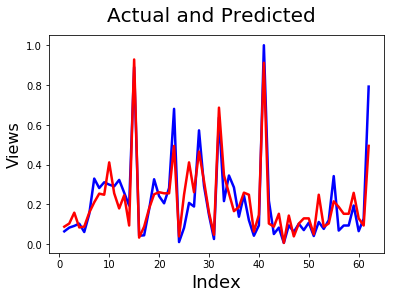

In [396]:
#Actual vs Predicted
# As we can see the model is fiting properly
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test_m7, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

Text(0,0.5,'Views_show-Predicted_views')

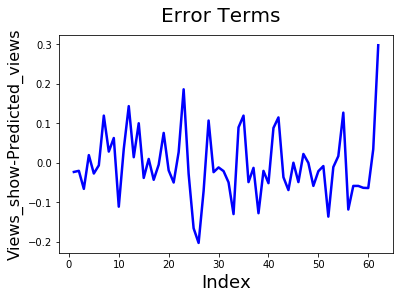

In [397]:
# Error terms
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test_m7-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label

#### Assumptions of Linear Regression
- Linearity: As we can see bellow scatter plot linierly distributed

Text(0,0.5,'y_pred')

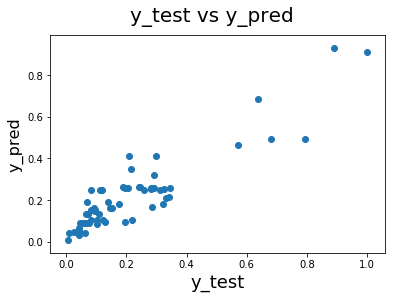

In [398]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test_m7,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

#### Residual plot 
- properly distributed around 0 which means good fit model

Text(0,0.5,'Index')

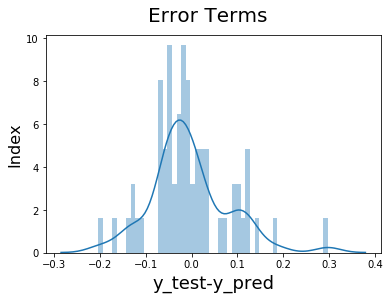

In [399]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test_m7-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

### RMSE value
- lower the RMSE better the model performance, also we can see in above distribution the residual is around 0.

In [400]:
# Now let's check the Root Mean Square Error of our model.
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test_m7, y_pred)))

RMSE : 0.08586514469292264


In [401]:
mse = mean_squared_error(y_test_m7, y_pred)
r_squared = r2_score(y_test_m7, y_pred)

In [402]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.00737282307313654
r_square_value : 0.8291648082254712


### Model-7 Observation
#### Assumptions of Linear Regression
- I can see a good model with R-Square = 0.839
- I can see good adjusted R-Squared = 0.832
- As R-Squared and adjusted R-Squared is very close, we can assume none of the other variable need to add into the model as predictor. 
- Model have Durbin-Watson:2.132 which is between 0 and 4, we can assume there is no Autocorrelation
- As we can see VIF<5 which means no Multicollinearity
- P value is less the 0.05 which means they are highly significant variable. 

#### Result
- These are the driving factor on which the pricing of cars dependswhich stroke,enginesize,fuelsystem_idi,car_company_bmw,cylindernumber_two,car_company_subaru